<a href="https://colab.research.google.com/github/dhruvilmaniar/PracticalTF/blob/master/TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
!pip install -q tensorflow

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [4]:
dataset = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
train_images, test_images = train_images/255.0, test_images/ 255.0

In [0]:
def show_image(img, label):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.title(label)
  plt.show()

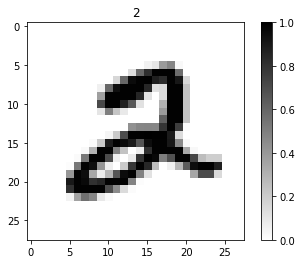

In [10]:
show_image(train_images[5], train_labels[5])

In [0]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
model.fit(train_images,train_labels,epochs = 5)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2989 - accuracy: 0.9129
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1459 - accuracy: 0.9560
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1107 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0905 - accuracy: 0.9723
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0757 - accuracy: 0.9762
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
test_loss, test_acc

(0.07605638119885698, 0.9769)

In [0]:
predictions = model.predict(test_images)

In [16]:
predictions.shape

(10000, 10)

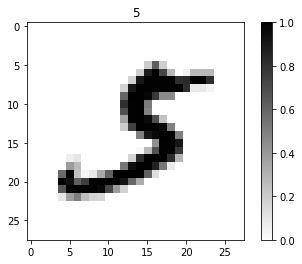

In [18]:
def predict_image(img, prediction):
  plt.imshow(img, cmap = plt.cm.binary)
  plt.colorbar()
  plt.title(prediction)
  plt.show()

predict_image(test_images[502], np.argmax(predictions[502]))